In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data= pd.read_csv('/content/data.csv')

In [ ]:
data.head()

,Sl. No.,NT,THT,THt,THQCr,CT,Ct,DT,Dt,QmT,...,S,Ni,Cr,Cu,Mo,RedRatio,dA,dB,dC,Fatigue
0,1,885,30,0,0,30,0.0,30.0,0.0,30,...,0.022,0.01,0.02,0.01,0.0,825,0.07,0.02,0.04,232
1,2,885,30,0,0,30,0.0,30.0,0.0,30,...,0.017,0.08,0.12,0.08,0.0,610,0.11,0.00,0.04,235
2,3,885,30,0,0,30,0.0,30.0,0.0,30,...,0.015,0.02,0.03,0.01,0.0,1270,0.07,0.02,0.00,235
3,4,885,30,0,0,30,0.0,30.0,0.0,30,...,0.024,0.01,0.02,0.01,0.0,1740,0.06,0.00,0.00,241
4,5,885,30,0,0,30,0.0,30.0,0.0,30,...,0.022,0.01,0.02,0.02,0.0,825,0.04,0.02,0.00,225


In [ ]:
data.isnull().sum()

,0
Sl. No.,0
NT,0
THT,0
THt,0
THQCr,0
CT,0
Ct,0
DT,0
Dt,0
QmT,0


In [ ]:
data.shape

(437, 27)

In [ ]:
data.columns

Index(['Sl. No.', 'NT', 'THT', 'THt', 'THQCr', 'CT', 'Ct', 'DT', 'Dt', 'QmT',
       'TT', 'Tt', 'TCr', 'C', 'Si', 'Mn', 'P', 'S', 'Ni', 'Cr', 'Cu', 'Mo',
       'RedRatio', 'dA', 'dB', 'dC', 'Fatigue'],
      dtype='object')

Split data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data.drop(columns=['Sl. No.', 'Fatigue'])
y=data['Fatigue']

In [ ]:
X

,NT,THT,THt,THQCr,CT,Ct,DT,Dt,QmT,TT,...,P,S,Ni,Cr,Cu,Mo,RedRatio,dA,dB,dC
0,885,30,0,0,30,0.0,30.000,0.0,30,30,...,0.017,0.022,0.01,0.02,0.01,0.00,825,0.070,0.020,0.040
1,885,30,0,0,30,0.0,30.000,0.0,30,30,...,0.009,0.017,0.08,0.12,0.08,0.00,610,0.110,0.000,0.040
2,885,30,0,0,30,0.0,30.000,0.0,30,30,...,0.008,0.015,0.02,0.03,0.01,0.00,1270,0.070,0.020,0.000
3,885,30,0,0,30,0.0,30.000,0.0,30,30,...,0.018,0.024,0.01,0.02,0.01,0.00,1740,0.060,0.000,0.000
4,885,30,0,0,30,0.0,30.000,0.0,30,30,...,0.026,0.022,0.01,0.02,0.02,0.00,825,0.040,0.020,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,930,30,0,0,930,340.2,895.812,70.2,140,160,...,0.015,0.024,0.02,0.91,0.01,0.15,240,0.050,0.010,0.000
433,930,30,0,0,930,340.2,895.812,70.2,140,160,...,0.016,0.015,0.07,1.08,0.08,0.15,530,0.017,0.004,0.008
434,930,30,0,0,930,340.2,895.812,70.2,60,200,...,0.012,0.019,0.06,1.17,0.07,0.17,690,0.080,0.000,0.000
435,930,30,0,0,930,340.2,895.812,70.2,60,200,...,0.015,0.024,0.02,0.91,0.01,0.15,240,0.050,0.010,0.000


In [ ]:
y

,Fatigue
0,232
1,235
2,235
3,241
4,225
...,...
432,1030
433,957
434,1104
435,1008


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

LINEAR REGRESSION & CROSS VALIDATION

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [ ]:
lr = LinearRegression()
cv_scores_lr = cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Linear Regression CV MSE:", -cv_scores_lr.mean())

lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Linear Regression Test MSE:", mean_squared_error(y_test, y_pred_lr))

Linear Regression CV MSE: 1314.7685308969167
Linear Regression Test MSE: 1034.3646336945117


RANDOM FOREST & CROSS VALIDATION

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(random_state=42)

In [ ]:
cv_scores_rf = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Random Forest CV MSE:", -cv_scores_rf.mean())

Random Forest CV MSE: 904.4709950641821


In [ ]:
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Test MSE:", mean_squared_error(y_test, y_pred_rf))


Random Forest Test MSE: 634.8262034090911


In [ ]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]


FEATURE IMPORTANCE

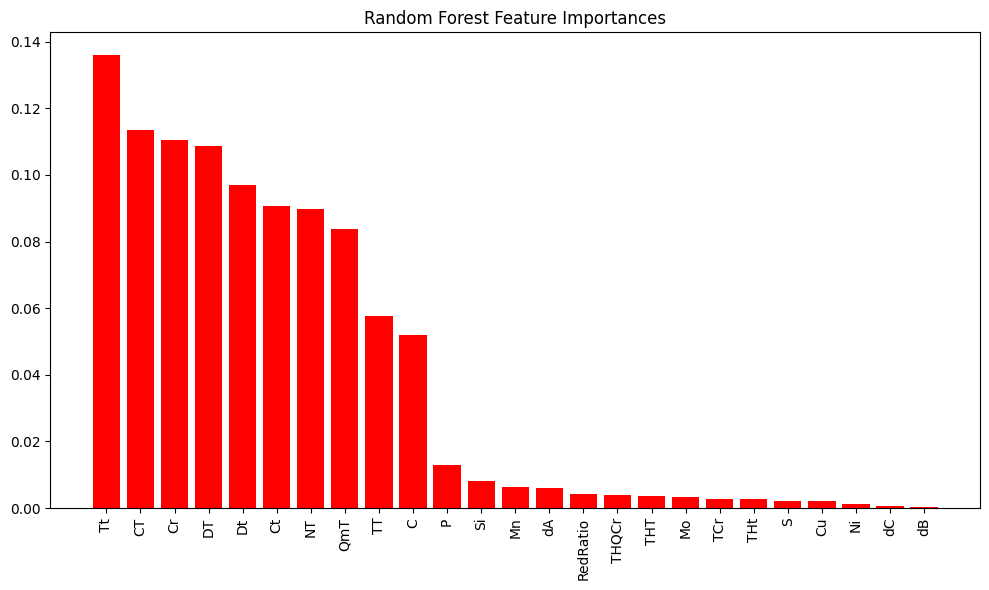

In [ ]:
plt.figure(figsize=(10, 6))
plt.title("Random Forest Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center",color='red')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gbr = GradientBoostingRegressor(random_state=42)
cv_scores_gbr = cross_val_score(gbr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Gradient Boosting CV MSE:", -cv_scores_gbr.mean())

Gradient Boosting CV MSE: 790.5558044818497


In [ ]:
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)
print("Gradient Boosting Test MSE:", mean_squared_error(y_test, y_pred_gbr))

Gradient Boosting Test MSE: 446.90689218649004


RESULT GRAPH

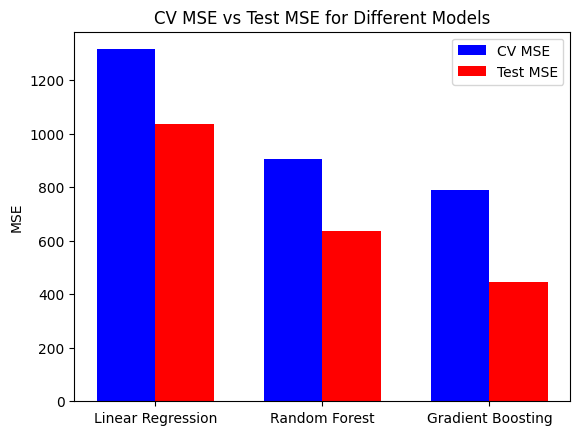

In [ ]:
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting']
cv_mse = [1314.7685308969167, 904.4709950641821, 790.5558044818497]
test_mse = [1034.3646336945117, 634.8262034090911, 446.90689218649004]

x = np.arange(len(models))
width = 0.35


plt.bar(x - width/2, cv_mse, width, label='CV MSE', color='blue')
plt.bar(x + width/2, test_mse, width, label='Test MSE', color='red')

plt.ylabel('MSE')
plt.title('CV MSE vs Test MSE for Different Models')
plt.xticks(x, models)
plt.legend()

plt.show()